# COVID-19 Analysis in EU/EEA Countries

This notebook analyzes COVID-19 cases and deaths data across EU/EEA countries

## Objectives
- Analyze daily COVID-19 cases and deaths over time
- Calculate moving averages to identify trends
- Perform quarterly aggregation analysis
- Compare statistics across different countries
- Visualize correlation between cases and deaths

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better-looking plots
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")

# Some usefull constant
DAILY_CASE_CSV = "datasets/data-daily-new-cases-covid-19-eueea-country.csv"
COUNTRY_NAME = "France"

## 1. Import Libraries

We import essential Python libraries for data manipulation, numerical operations, and visualization:
- **pandas**: For data loading and manipulation
- **numpy**: For numerical operations
- **matplotlib & seaborn**: For creating visualizations
- **datetime**: For date/time operations

## 2. Configuration

Define file paths and analysis parameters. You can change the `COUNTRY_NAME` variable to analyze different countries available in the dataset.

In [3]:
# Load and process COVID-19 data
daily_case_data = pd.read_csv(DAILY_CASE_CSV)

# Convert date column to datetime
daily_case_data["date"] = pd.to_datetime(daily_case_data["dateRep"], format="%d/%m/%Y")

# Add temporal columns for analysis
daily_case_data["quarter"] = daily_case_data["date"].dt.to_period("Q")
daily_case_data["year"] = daily_case_data["date"].dt.year
daily_case_data["month"] = daily_case_data["date"].dt.month
daily_case_data["week"] = daily_case_data["date"].dt.isocalendar().week

# Sort by date for proper time series analysis
daily_case_data = daily_case_data.sort_values("date")

print("Data Overview:")
print(f"Date range: {daily_case_data['date'].min()} to {daily_case_data['date'].max()}")
print(f"Number of countries: {daily_case_data['countriesAndTerritories'].nunique()}")
print(f"\nBasic Statistics:")
print(daily_case_data[["cases", "deaths"]].describe())

daily_case_data.head()

Data Overview:
Date range: 2020-01-01 00:00:00 to 2022-10-26 00:00:00
Number of countries: 30

Basic Statistics:
               cases        deaths
count   28636.000000  28437.000000
mean     6114.012222     40.887541
std     21448.717044    128.722598
min         0.000000      0.000000
25%       111.000000      0.000000
50%       706.000000      5.000000
75%      3485.500000     31.000000
max    501635.000000  13743.000000


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp,date,quarter,week
8597,01/01/2020,1,1,2020,1.0,0.0,Finland,FI,FIN,5525292,Europe,2020-01-01,2020Q1,1
27746,01/01/2020,1,1,2020,1.0,0.0,Spain,ES,ESP,47332614,Europe,2020-01-01,2020Q1,1
10595,02/01/2020,2,1,2020,1.0,0.0,Germany,DE,DEU,83166711,Europe,2020-01-02,2020Q1,1
8596,02/01/2020,2,1,2020,0.0,0.0,Finland,FI,FIN,5525292,Europe,2020-01-02,2020Q1,1
27745,02/01/2020,2,1,2020,0.0,0.0,Spain,ES,ESP,47332614,Europe,2020-01-02,2020Q1,1


## 4. Daily Cases Time Series Analysis

Visualize daily COVID-19 cases with:
- **Daily bars**: Show individual day fluctuations
- **7-day moving average**: Smooth out weekly variations (weekends often show reporting delays)
- **30-day moving average**: Reveal longer-term trends
- **Quarter boundaries**: Vertical lines marking each quarter for temporal reference

Moving averages help identify genuine trends by reducing noise from day-to-day reporting variations.

## 3. Data Loading and Processing

Load the COVID-19 dataset and prepare it for analysis:
- Convert date strings to datetime objects for proper time series analysis
- Add temporal columns (quarter, year, month, week) for aggregation
- Sort data chronologically for accurate trend visualization

The dataset contains daily reported COVID-19 cases and deaths by EU/EEA country.

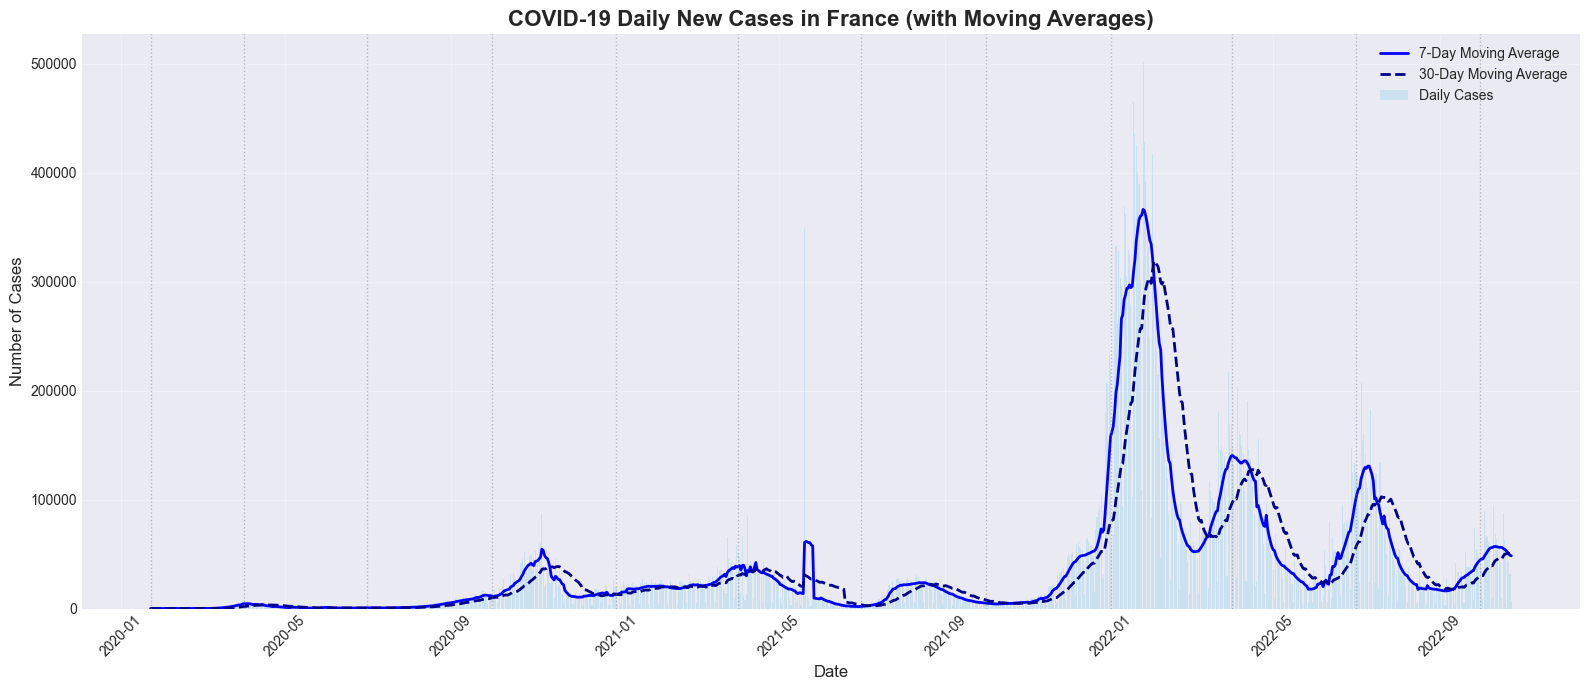


Cases Summary for France:
Total cases: 37,311,857
Average daily cases: 37,089
Peak daily cases: 501,635 on 2022-01-25


In [4]:
# Advanced time series visualization with moving averages
country_data = daily_case_data[
    daily_case_data["countriesAndTerritories"] == COUNTRY_NAME
].copy()

# Calculate 7-day and 30-day moving averages
country_data["cases_7day_avg"] = (
    country_data["cases"].rolling(window=7, min_periods=1).mean()
)
country_data["cases_30day_avg"] = (
    country_data["cases"].rolling(window=30, min_periods=1).mean()
)

# Create visualization
fig, ax = plt.subplots(figsize=(16, 7))

# Plot daily cases
ax.bar(
    country_data["date"],
    country_data["cases"],
    alpha=0.3,
    label="Daily Cases",
    color="skyblue",
)

# Plot moving averages
ax.plot(
    country_data["date"],
    country_data["cases_7day_avg"],
    label="7-Day Moving Average",
    color="blue",
    linewidth=2,
)
ax.plot(
    country_data["date"],
    country_data["cases_30day_avg"],
    label="30-Day Moving Average",
    color="darkblue",
    linewidth=2,
    linestyle="--",
)

# Add quarter boundaries
quarters = country_data.groupby("quarter")["date"].min()
for quarter_start in quarters:
    ax.axvline(x=quarter_start, color="gray", linestyle=":", alpha=0.5, linewidth=1)

ax.set_title(
    f"COVID-19 Daily New Cases in {COUNTRY_NAME} (with Moving Averages)",
    fontsize=16,
    fontweight="bold",
)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Number of Cases", fontsize=12)
ax.legend(loc="upper right", fontsize=10)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nCases Summary for {COUNTRY_NAME}:")
print(f"Total cases: {country_data['cases'].sum():,.0f}")
print(f"Average daily cases: {country_data['cases'].mean():,.0f}")
print(
    f"Peak daily cases: {country_data['cases'].max():,.0f} on {country_data.loc[country_data['cases'].idxmax(), 'date'].strftime('%Y-%m-%d')}"
)

## 5. Daily Deaths Time Series Analysis

Similar to cases, we analyze daily deaths with moving averages to:
- Identify mortality trends over time
- Compare patterns with case trends (deaths typically lag cases by 2-3 weeks)
- Calculate case fatality rate (CFR) to understand disease severity

The visualization uses the same moving average approach to reduce reporting noise.

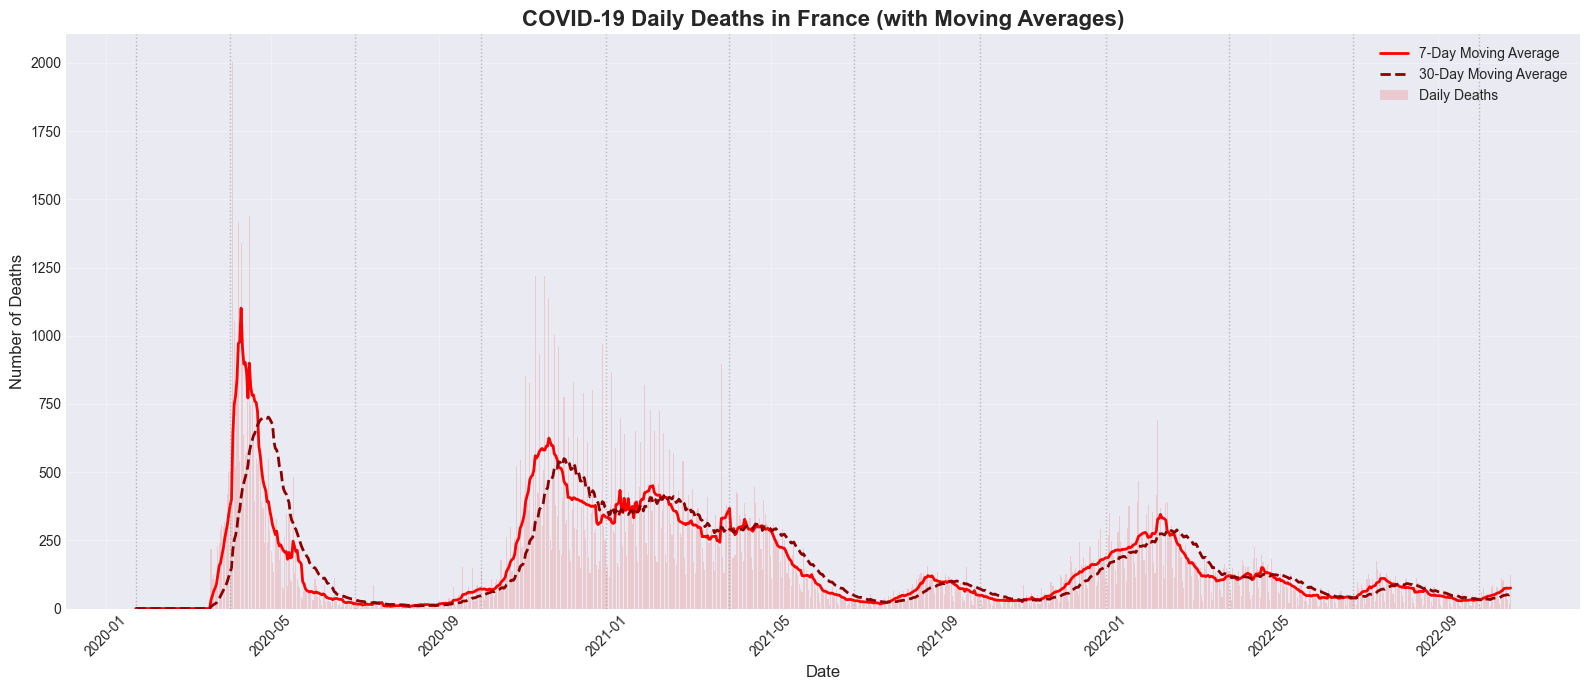


Deaths Summary for France:
Total deaths: 157,007
Average daily deaths: 156.1
Peak daily deaths: 2,004 on 2020-04-03
Case fatality rate: 0.42%


In [5]:
# Advanced deaths visualization with moving averages
# Calculate 7-day and 30-day moving averages for deaths
country_data["deaths_7day_avg"] = (
    country_data["deaths"].rolling(window=7, min_periods=1).mean()
)
country_data["deaths_30day_avg"] = (
    country_data["deaths"].rolling(window=30, min_periods=1).mean()
)

# Create visualization
fig, ax = plt.subplots(figsize=(16, 7))

# Plot daily deaths
ax.bar(
    country_data["date"],
    country_data["deaths"],
    alpha=0.3,
    label="Daily Deaths",
    color="lightcoral",
)

# Plot moving averages
ax.plot(
    country_data["date"],
    country_data["deaths_7day_avg"],
    label="7-Day Moving Average",
    color="red",
    linewidth=2,
)
ax.plot(
    country_data["date"],
    country_data["deaths_30day_avg"],
    label="30-Day Moving Average",
    color="darkred",
    linewidth=2,
    linestyle="--",
)

# Add quarter boundaries
for quarter_start in quarters:
    ax.axvline(x=quarter_start, color="gray", linestyle=":", alpha=0.5, linewidth=1)

ax.set_title(
    f"COVID-19 Daily Deaths in {COUNTRY_NAME} (with Moving Averages)",
    fontsize=16,
    fontweight="bold",
)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Number of Deaths", fontsize=12)
ax.legend(loc="upper right", fontsize=10)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nDeaths Summary for {COUNTRY_NAME}:")
print(f"Total deaths: {country_data['deaths'].sum():,.0f}")
print(f"Average daily deaths: {country_data['deaths'].mean():,.1f}")
print(
    f"Peak daily deaths: {country_data['deaths'].max():,.0f} on {country_data.loc[country_data['deaths'].idxmax(), 'date'].strftime('%Y-%m-%d')}"
)
print(
    f"Case fatality rate: {(country_data['deaths'].sum() / country_data['cases'].sum() * 100):.2f}%"
)

## 6. Comparative Country Analysis

This section compares the top 10 countries most affected by COVID-19 using multiple metrics:

1. **Total Cases**: Raw number of infections
2. **Total Deaths**: Raw number of fatalities
3. **Cases per 100k Population**: Normalized by population for fair comparison
4. **Mortality Rate**: Deaths/Cases ratio showing disease severity

Population normalization is crucial for comparing countries of different sizes.

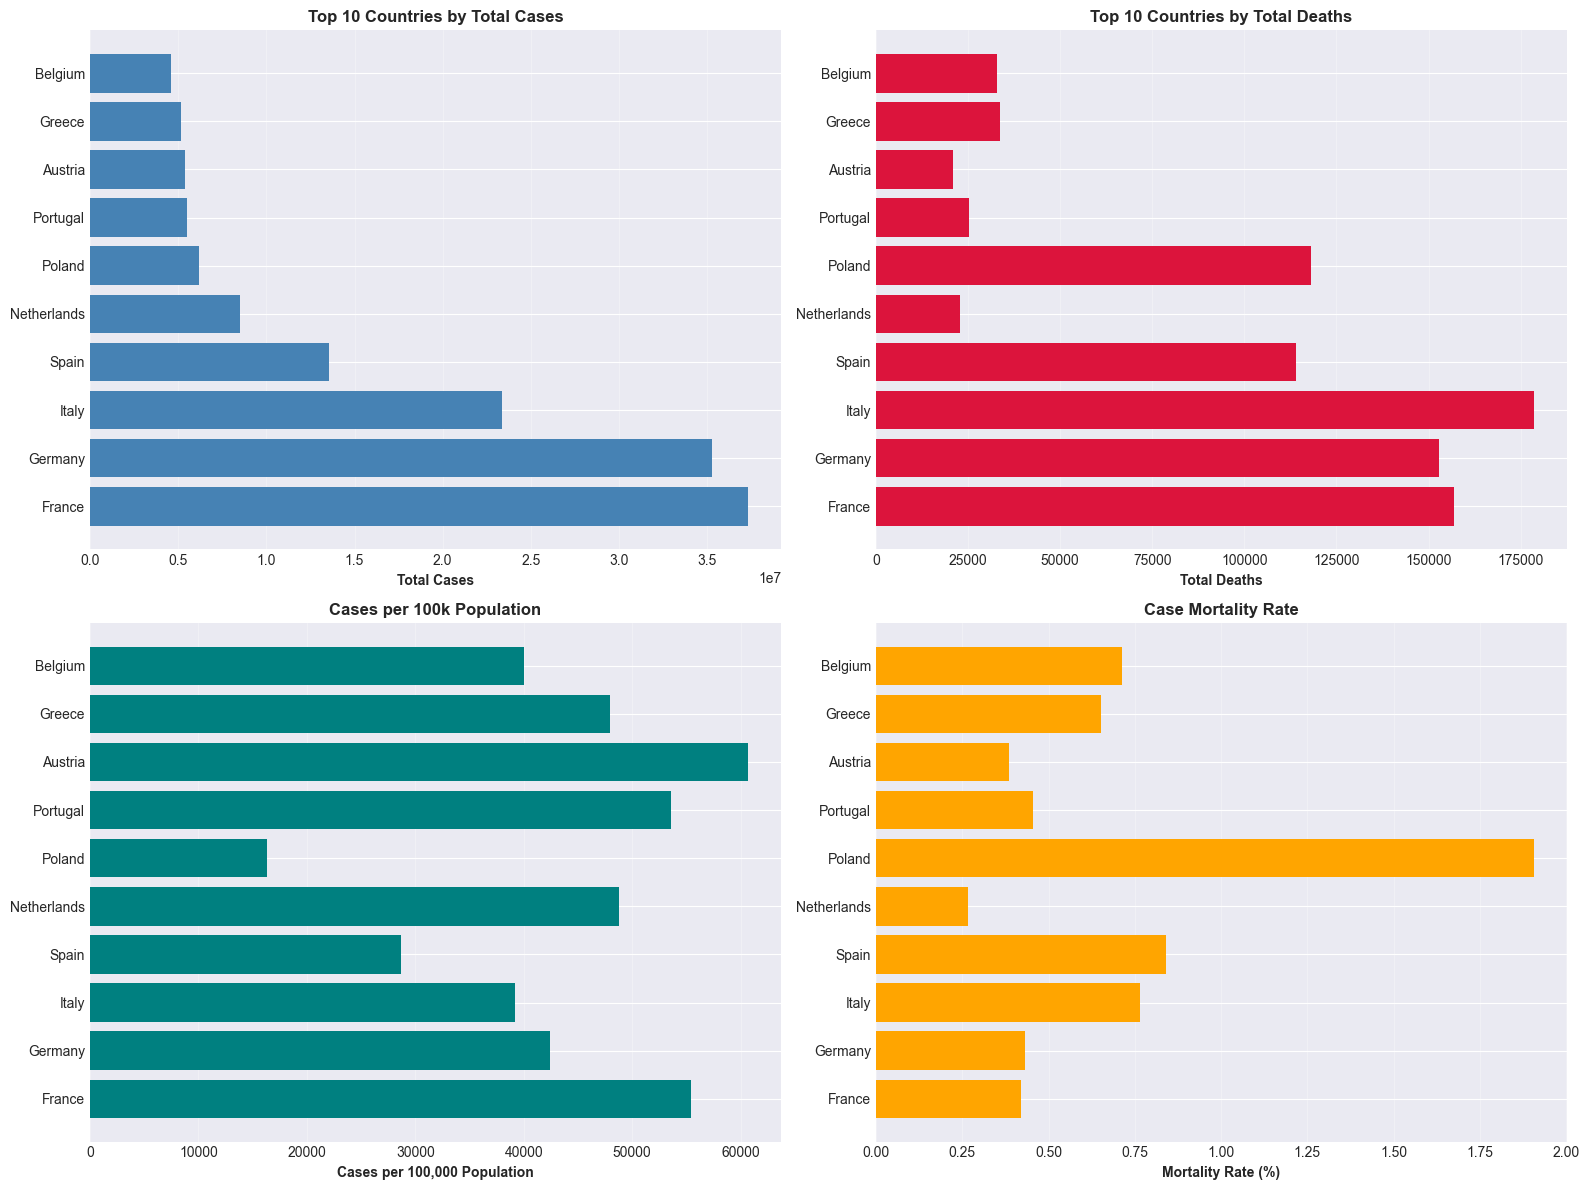


Top 10 Countries Summary:
countriesAndTerritories      cases   deaths  cases_per_100k  mortality_rate
                 France 37311857.0 157007.0    55424.446351        0.420797
                Germany 35287690.0 152753.0    42430.065558        0.432879
                  Italy 23359976.0 178695.0    39167.325939        0.764962
                  Spain 13564823.0 114110.0    28658.512289        0.841220
            Netherlands  8494705.0  22771.0    48798.871297        0.268061
                 Poland  6189562.0 118050.0    16306.284571        1.907243
               Portugal  5514482.0  25131.0    53559.933368        0.455727
                Austria  5402162.0  20899.0    60691.193772        0.386864
                 Greece  5140918.0  33574.0    47962.745013        0.653074
                Belgium  4607296.0  32883.0    39985.419755        0.713716


In [6]:
# Comparative analysis: Top 10 countries by total cases
top_countries = (
    daily_case_data.groupby("countriesAndTerritories")
    .agg({"cases": "sum", "deaths": "sum", "popData2020": "first"})
    .reset_index()
)

top_countries["cases_per_100k"] = (
    top_countries["cases"] / top_countries["popData2020"] * 100000
)
top_countries["deaths_per_100k"] = (
    top_countries["deaths"] / top_countries["popData2020"] * 100000
)
top_countries["mortality_rate"] = top_countries["deaths"] / top_countries["cases"] * 100

top_countries_sorted = top_countries.nlargest(10, "cases")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Total cases
axes[0, 0].barh(
    top_countries_sorted["countriesAndTerritories"],
    top_countries_sorted["cases"],
    color="steelblue",
)
axes[0, 0].set_xlabel("Total Cases", fontweight="bold")
axes[0, 0].set_title("Top 10 Countries by Total Cases", fontweight="bold")
axes[0, 0].grid(True, alpha=0.3, axis="x")

# Total deaths
axes[0, 1].barh(
    top_countries_sorted["countriesAndTerritories"],
    top_countries_sorted["deaths"],
    color="crimson",
)
axes[0, 1].set_xlabel("Total Deaths", fontweight="bold")
axes[0, 1].set_title("Top 10 Countries by Total Deaths", fontweight="bold")
axes[0, 1].grid(True, alpha=0.3, axis="x")

# Cases per 100k population
axes[1, 0].barh(
    top_countries_sorted["countriesAndTerritories"],
    top_countries_sorted["cases_per_100k"],
    color="teal",
)
axes[1, 0].set_xlabel("Cases per 100,000 Population", fontweight="bold")
axes[1, 0].set_title("Cases per 100k Population", fontweight="bold")
axes[1, 0].grid(True, alpha=0.3, axis="x")

# Mortality rate
axes[1, 1].barh(
    top_countries_sorted["countriesAndTerritories"],
    top_countries_sorted["mortality_rate"],
    color="orange",
)
axes[1, 1].set_xlabel("Mortality Rate (%)", fontweight="bold")
axes[1, 1].set_title("Case Mortality Rate", fontweight="bold")
axes[1, 1].grid(True, alpha=0.3, axis="x")

plt.tight_layout()
plt.show()

print("\nTop 10 Countries Summary:")
print(
    top_countries_sorted[
        [
            "countriesAndTerritories",
            "cases",
            "deaths",
            "cases_per_100k",
            "mortality_rate",
        ]
    ].to_string(index=False)
)

## 7. Cases vs Deaths Correlation

A dual-axis visualization showing the relationship between cases and deaths over time:
- **Blue area**: Cases (left y-axis)
- **Red area**: Deaths (right y-axis)

This helps identify:
- The lag between case surges and death increases
- How the relationship changed over time (improving treatments, vaccination, variants)
- Periods of increased or decreased severity

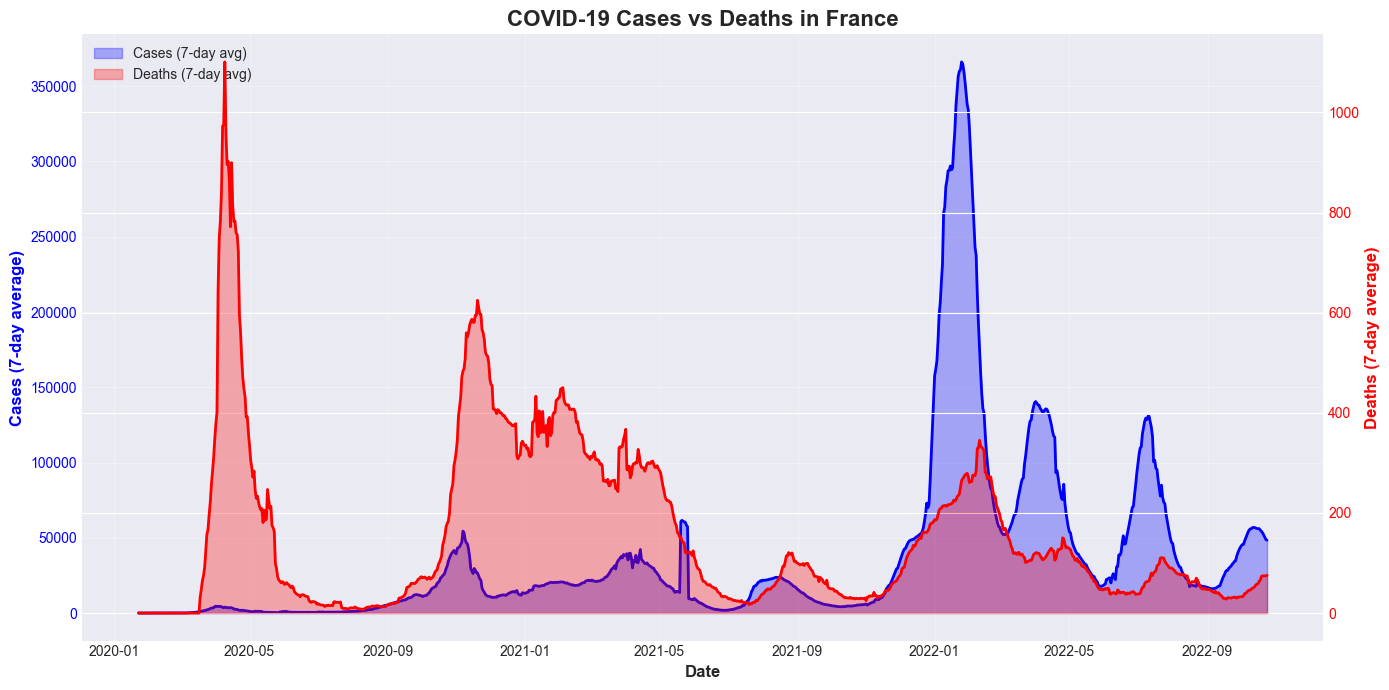

In [7]:
# Combined visualization: Cases vs Deaths correlation
fig, ax = plt.subplots(figsize=(14, 7))

# Create dual-axis plot
ax2 = ax.twinx()

# Plot cases on left axis
ax.fill_between(
    country_data["date"],
    country_data["cases_7day_avg"],
    alpha=0.3,
    color="blue",
    label="Cases (7-day avg)",
)
ax.plot(country_data["date"], country_data["cases_7day_avg"], color="blue", linewidth=2)

# Plot deaths on right axis
ax2.fill_between(
    country_data["date"],
    country_data["deaths_7day_avg"],
    alpha=0.3,
    color="red",
    label="Deaths (7-day avg)",
)
ax2.plot(
    country_data["date"], country_data["deaths_7day_avg"], color="red", linewidth=2
)

# Labels and formatting
ax.set_xlabel("Date", fontsize=12, fontweight="bold")
ax.set_ylabel("Cases (7-day average)", color="blue", fontsize=12, fontweight="bold")
ax2.set_ylabel("Deaths (7-day average)", color="red", fontsize=12, fontweight="bold")
ax.set_title(
    f"COVID-19 Cases vs Deaths in {COUNTRY_NAME}", fontsize=16, fontweight="bold"
)

ax.tick_params(axis="y", labelcolor="blue")
ax2.tick_params(axis="y", labelcolor="red")

# Add legend
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc="upper left", fontsize=10)

ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Quarterly Aggregation

Aggregate data by quarter to show:
- **Total cases/deaths per quarter**: Overall burden each quarter
- **Average daily cases/deaths**: Typical daily rate
- **Maximum daily cases/deaths**: Peak days in each quarter

This aggregation reveals:
- Seasonal patterns (if any)
- Major pandemic waves
- Overall trajectory of the pandemic


Quarterly Analysis for France:
   quarter   cases_sum  cases_mean  cases_max  deaths_sum  deaths_mean  \
0   2020Q1     52134.0      755.57     7578.0      3523.0        51.06   
1   2020Q2    114205.0     1255.00     5497.0     26734.0       293.78   
2   2020Q3    398734.0     4334.07    16096.0      2173.0        23.62   
3   2020Q4   2056890.0    22357.50    86852.0     32674.0       355.15   
4   2021Q1   2023998.0    22488.87    65373.0     31034.0       344.82   
5   2021Q2   1828570.0    20094.18   348846.0     15442.0       169.69   
6   2021Q3   1238131.0    13457.95    30920.0      5608.0        60.96   
7   2021Q4   2959368.0    32167.04   232200.0      7051.0        76.64   
8   2022Q1  15642043.0   173800.48   501635.0     18532.0       205.91   
9   2022Q2   5474911.0    60163.86   203021.0      7260.0        79.78   
10  2022Q3   4307356.0    46819.09   206554.0      5579.0        60.64   
11  2022Q4   1215517.0    50646.54    94753.0      1397.0        58.21   

    d

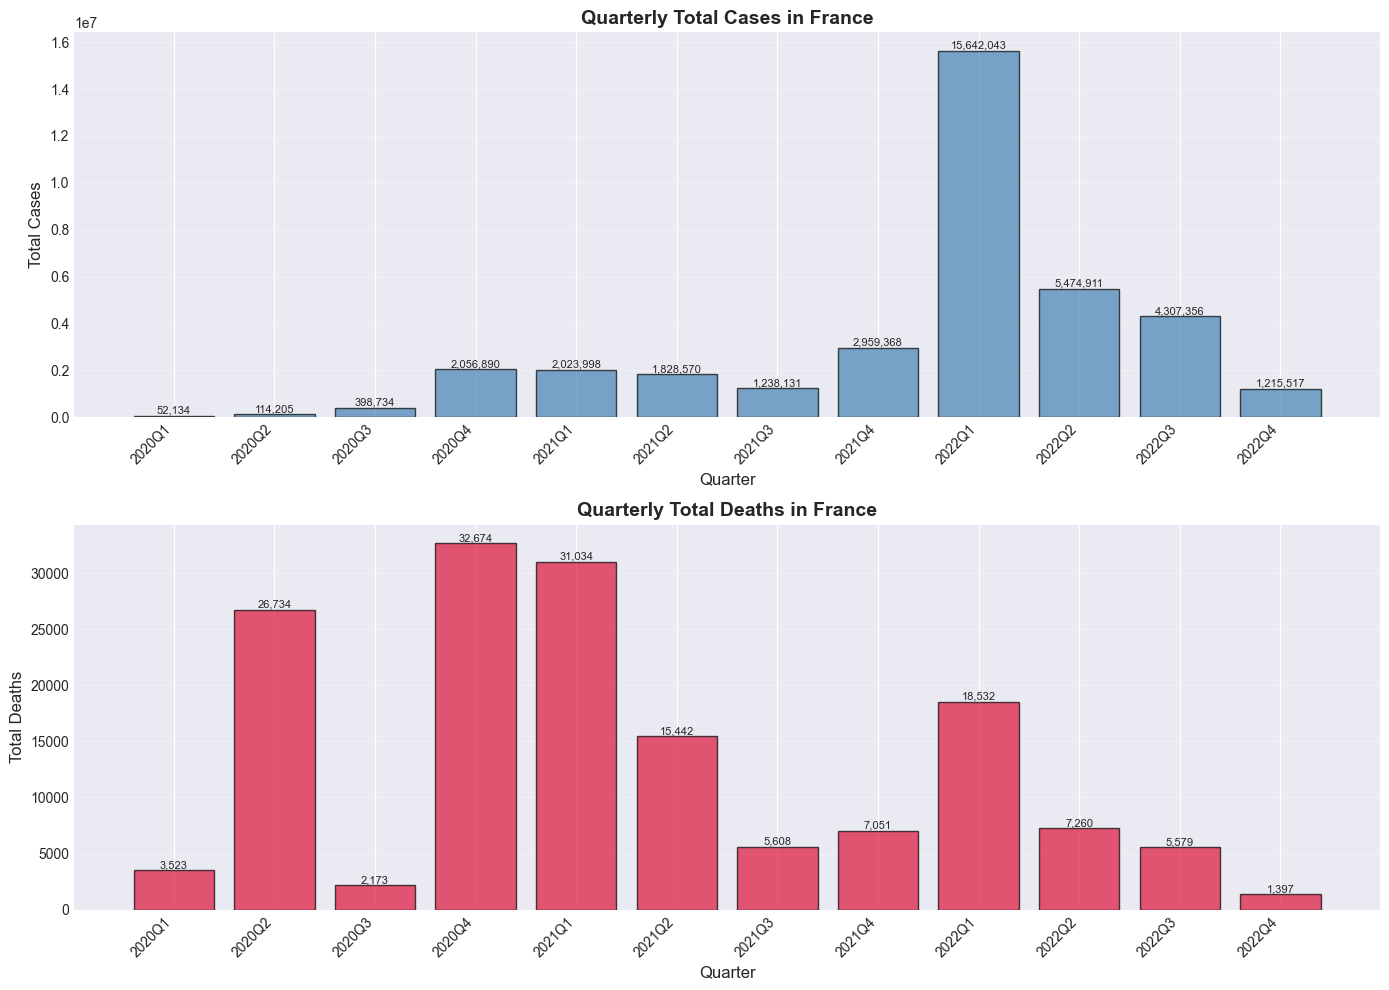

In [8]:
# Quarterly aggregation analysis
quarterly_data = (
    country_data.groupby("quarter")
    .agg(
        {
            "cases": ["sum", "mean", "max"],
            "deaths": ["sum", "mean", "max"],
            "date": ["min", "max"],
        }
    )
    .round(2)
)

quarterly_data.columns = [
    "_".join(col).strip() for col in quarterly_data.columns.values
]
quarterly_data = quarterly_data.reset_index()

print(f"\nQuarterly Analysis for {COUNTRY_NAME}:")
print(quarterly_data)

# Visualize quarterly trends
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Quarterly cases
quarters_str = [str(q) for q in quarterly_data["quarter"]]
x_pos = np.arange(len(quarters_str))

ax1.bar(
    x_pos, quarterly_data["cases_sum"], alpha=0.7, color="steelblue", edgecolor="black"
)
ax1.set_title(
    f"Quarterly Total Cases in {COUNTRY_NAME}", fontsize=14, fontweight="bold"
)
ax1.set_xlabel("Quarter", fontsize=12)
ax1.set_ylabel("Total Cases", fontsize=12)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(quarters_str, rotation=45, ha="right")
ax1.grid(True, alpha=0.3, axis="y")

# Add value labels on bars
for i, v in enumerate(quarterly_data["cases_sum"]):
    ax1.text(i, v, f"{int(v):,}", ha="center", va="bottom", fontsize=8)

# Quarterly deaths
ax2.bar(
    x_pos, quarterly_data["deaths_sum"], alpha=0.7, color="crimson", edgecolor="black"
)
ax2.set_title(
    f"Quarterly Total Deaths in {COUNTRY_NAME}", fontsize=14, fontweight="bold"
)
ax2.set_xlabel("Quarter", fontsize=12)
ax2.set_ylabel("Total Deaths", fontsize=12)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(quarters_str, rotation=45, ha="right")
ax2.grid(True, alpha=0.3, axis="y")

# Add value labels on bars
for i, v in enumerate(quarterly_data["deaths_sum"]):
    ax2.text(i, v, f"{int(v):,}", ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()